In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = f'Cats_vs_dogs_cnn_64x2_{int(time.time())}'
#tensorboard = TensorBoard(log_dir = f'logs\\{NAME}') # \\ bc windows...

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# from terminal opened in anaconda:

#>>>cd "C:\Users\xpn381\Documents\Python Scripts"
#>>>tensorboard --logdir="logs/" --host localhost --port 8088
#Then navigated the browser to http://localhost:8088
# something happens.. seems to work..
# needs to restart terminal command to see updates...
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

X = pickle.load(open('X.pickle','rb'))
y = pickle.load(open('y.pickle','rb'))

X = X/255 # handon normalization

# 1. layer
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) # can skip the first entry X.shape[0]
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# 2. layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# 3. layer
model.add(Flatten()) # from 2D to 1D
model.add(Dense(64))
model.add(Activation('relu'))

# ouyput layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir = f'logs\\{NAME}') # \\ bc windows...

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#history = model.fit(X, y, batch_size=32, epochs=4, validation_split=0.3, callbacks=[tensorboard]) # batch 20-200 depends on the size of you dataset
model.fit(X, y, batch_size=32, epochs=4, validation_split=0.3, callbacks=[tensorboard]) # batch 20-200 depends on the size of you dataset


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17462 samples, validate on 7484 samples
Epoch 1/4
17462/17462 [==============================] - 246s 14ms/sample - loss: 0.6117 - acc: 0.6570 - val_loss: 0.5592 - val_acc: 0.7119
Epoch 2/4
17462/17462 [==============================] - 266s 15ms/sample - loss: 0.5168 - acc: 0.7445 - val_loss: 0.4931 - val_acc: 0.7579
Epoch 3/4
12704/17462 [====================>.........] - ETA: 1:08 - loss: 0.4566 - acc: 0.7838

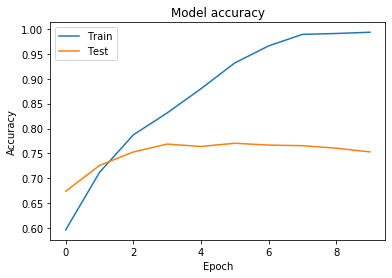

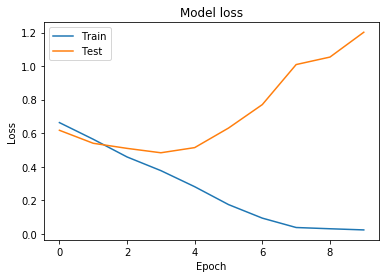

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left') # you only use train here..
plt.show()

In [ ]:
#OLD:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# from anaconda prompt:

#>>>tensorboard --logdir=logs/ --host localhost --port 8088
# or
#>>>tensorboard --logdir=C:\Users\xpn381\Documents\Python Scripts\logs\ --host localhost --port 8088

#Then navigated the browser to http://localhost:8088
# stil do not work...
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
